# Introduction

#### This research aims to analyze and explore the CIC-IDS2017 dataset, a collection of network traffic data containing both benign and malicious activity. Through data cleaning and processing, we will prepare the data for training various machine learning models, including Artificial Neural Networks (ANNs), Random Forests (RFs), Autoencoders, and K-means clustering. Our primary objective is to gain valuable insights from the CIC-IDS2017 dataset and establish an effective anomaly detection method that minimizes computational requirements.

#### This Jupyter notebook documents the process of data cleaning, exploration, and preparation for subsequent model training. We will explore techniques to address potential issues within the data and transform it into a suitable format for machine learning algorithms. Ultimately, we hope to identify the model that achieves the best anomaly detection performance while maintaining computational efficiency.

# Getting Started

## Importing Libraries

In [2]:
# for scientific computing
import numpy as np

# for dataframes and series
import pandas as pd 

# for creating visualizations and plotting
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

# for encoding (converting categorical data into numerical values)
from sklearn.preprocessing import LabelEncoder

#### printing DataFrames, it should not truncate the display of columns and show all of them

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## Data Import

In [5]:
# DDos attack friday afternoon
df1 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

# Portscan Friday afternoon
df2 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

# botnet attack Friday Morning
df3 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv")

# monday is normal day just including the benign traffic
df4 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv")

# Infiltration attack (Thursday Afternoon)
df5 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

# web attacks Thursday morning
df6 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

#brutforce attack (Tuasday morning-afternoon)
df7 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv")

# Dos attacks Wednesday
df8 = pd.read_csv("MachineLearningCSV\MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv")

# Observing the Datasets

#### As mentioned in the Dataset publication article (https://www.unb.ca/cic/datasets/ids-2017.html) of the canadian Institute for Cyber Security Data are seperated into 8 Files for each time of different network flows as shown in the comment of each datframe above.
#### Observing each DataFrame

In [6]:
# DDos attack friday afternoon
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
# Portscan Friday afternoon
df2.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
# Portscan Friday afternoon
df3.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,72,72.0,0.0,67.411331,0.425756,2.398738e+06,5.798698e+06,16400000,3,113000000,3.636796e+06,6.848761e+06,16400000,3,113000000,7516023.200,8323384.915,16400000,3,1,0,0,0,1024,512,0.283837,0.141919,0,403,163.326531,178.931713,32016.55782,0,1,0,0,1,0,0,0,0,166.729167,201.5,72.0,1024,0,0,0,0,0,0,32,6448,16,1152,377,2079,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,316,316.0,0.0,102.039585,0.425756,2.398735e+06,5.798710e+06,16400000,2,113000000,3.636792e+06,6.848777e+06,16400000,2,113000000,7516016.133,8323376.147,16400000,4,1,0,0,0,1024,512,0.283838,0.141919,0,403,243.000000,174.716914,30526.00000,0,1,0,0,1,0,0,0,0,248.062500,201.5,316.0,1024,0,0,0,0,0,0,32,6448,16,5056,955,2079,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,4.790898,2.091128e+05,1.395543e+06,20800000,0,114000000,2.091128e+05,1.395543e+06,20800000,0,0,0.000,0.000,0,0,0,0,0,0,0,0,4.790898,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,545,0,0,0,-1,-1,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,0,0,0.0,0.0,6152.248167,219.723149,4.767905e+03,2.183302e+04,100055,1,100126,4.767905e+03,2.183302e+04,100055,1,0,0.000,0.000,0,0,0,0,0,0,704,0,219.723149,0.000000,28,28,28.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,29.272727,28.0,0.0,704,0,0,0,0,0,0,22,616,0,0,-1,-1,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,73.046019,1.825333e+04,3.046984e+04,53431,108,54760,1.825333e+04,3.046984e+04,53431,108,0,0.000,0.000,0,0,0,0,0,0,0,0,73.046019,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,4,0,0,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [9]:
# monday is normal day just including the benign traffic
df4.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3000000.0,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
# Infiltration attack (Thursday Afternoon)
df5.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166,166,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6024.096386,6024.096386,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49,34,0,0.0000,0.000,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12048.192770,24096.385540,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947,99947,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,40,40,10.005303,10.005303,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,40,0,0,0,0,0,0,1,48,1,48,-1,-1,0,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017,37017,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,27.014615,27.014615,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000,0,111000000,761379.0137,2539814.273,13600000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.322402,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,147,0,0,0,-1,-1,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [11]:
# web attacks Thursday morning
df6.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [12]:
# brutforce attack (Tuasday morning-afternoon)
df7.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
# Dos attacks 
df8.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### We know that each Dataframe has the same columns so we can concatinate them and make one big dataframe to work one. But before that lets explaine some important terms in order to understand the data
##### Packet: a unit of data that travels across a network, it contains data and control information.
##### Forward and Backward flows: Forward as the normal flow of data from source to destination (eg. from client to server), Backward flow is the transmission of data from destination back to the source which is the opposite

#### Lets explore the shape of each DataFrame (raws cols)

In [14]:
print("Shapes of each dataframe:\n")
print("-DDos attack friday afternoon:",df1.shape)
print("-Portscan Friday afternoon:",df2.shape)
print("-Botnet attack Friday Morning:",df3.shape)
print("-Monday is normal day just including the benign traffic:",df4.shape)
print("-Infiltration attack (Thursday Afternoon):",df5.shape)
print("-Web attacks Thursday morning:",df6.shape)
print("-Brutforce attack (Tuasday morning-afternoon):",df7.shape)
print("-Dos attacks Wednesday:",df8.shape)

Shapes of each dataframe:

-DDos attack friday afternoon: (225745, 79)
-Portscan Friday afternoon: (286467, 79)
-Botnet attack Friday Morning: (191033, 79)
-Monday is normal day just including the benign traffic: (529918, 79)
-Infiltration attack (Thursday Afternoon): (288602, 79)
-Web attacks Thursday morning: (170366, 79)
-Brutforce attack (Tuasday morning-afternoon): (445909, 79)
-Dos attacks Wednesday: (692703, 79)


#### Combining the datasets now to make one df to work with

In [15]:
# combining dataframes into df
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
# resetting the index and modify the df itself
df.reset_index(drop=True, inplace=True)

In [16]:
print(df[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [17]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [18]:
# shape of the entire combined dataframe
df.shape

(2830743, 79)

# Exploratory Data Analysis

#### Explaning the columns of the Dataset:
##### Bwd Packet Length Std : standard deviation of Packet Length in the backward direction.
##### PSH Flag Count: number of packets with the Push Flag set in the TCP Header.
##### min_seg_size_forward: Minimum segment size observed in the forward direction.
##### Min Packet Length: Minimum packet length observed in the network traffic data.
##### ACK Flag Count: Number of packets with the ACK (Acknowledgment) flag set in the TCP header.
##### Bwd Packet Length Min: Minimum packet length observed in the backward direction.
##### Fwd IAT Std: Standard deviation of the inter-arrival time (IAT) of packets in the forward direction.
##### Init_Win_bytes_forward: Initial window size in bytes observed in the forward direction.
##### Flow IAT Max: Maximum inter-arrival time (IAT) of packets in the flow.
##### Bwd Packets/s: Average number of packets transferred per second in the backward direction.
##### URG Flag Count: Number of packets with the URG (Urgent) flag set in the TCP header.
##### Bwd IAT Total:Total inter-arrival time (IAT) of packets in the backward direction
##### Label: Label assigned to the network flow, indicating whether it corresponds to benign traffic or malicious traffic associated with a specific type of cyber attack.
### Note: This data is labeled as we noticed the label columns and for now we keep it that way for performing the supervised learning

In [19]:
# description of data statistics
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [20]:
pd.set_option('display.max_rows', None) # for me to see all rows

In [21]:
# count of missing values for each column in the df
df.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

#### Now we can see the missing values in the df and we will handle it later in the document

In [22]:
# summary about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

#### We can see the datatypes of each column and NOTE that the memory usage is very huge (1.7+)

In [23]:
# Observing the unique labels of the data
df[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

#### These label are given to each row based on thenetwork flow and traffic type (if its benign or some attack)

In [24]:
# total duplicates of data
df.duplicated().sum()

308381

### Handling duplicates by dropping them which to ensure analysis is one unique network traffic events, avoid redundant data, Improve data accuracy and Reduce storage requirement for better performance and desicion making. And Eliminating rows with missing values

In [25]:
df = df.drop_duplicates(keep="first") # keep first occurence of each duplicate but delete others
df.dropna(inplace=True) # elimination rows with missing values
print("Shape of df after cleaning from redundancy and missing values:",df.shape)

Shape of df after cleaning from redundancy and missing values: (2522009, 79)


In [26]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [27]:
# counting the occurrences of each unique value within Label column
prediction_label_counts = df[' Label'].value_counts()
print("Counts of each label occurence in the dataset:\n",prediction_label_counts)

Counts of each label occurence in the dataset:
  Label
BENIGN                        2096134
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


### As shown there is hign class imbalance which is not good for traning and classification (for mre detailed info on this visit https://www.researchgate.net/publication/329045441_A_detailed_analysis_of_CICIDS2017_dataset_for_designing_Intrusion_Detection_Systems)

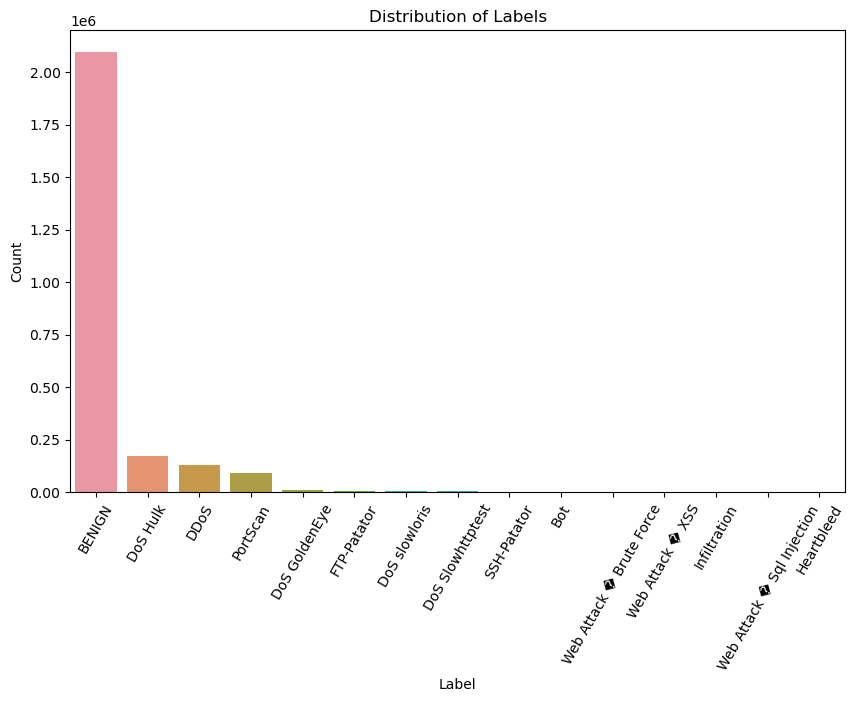

In [28]:
# Visualizing the distribution of labels
plt.figure(figsize=(10,6))
sns.barplot(x=prediction_label_counts.index, y=prediction_label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

### Imbalance is very high wo we will filter classes with few instances to ensure model focuses on  classes with suficient data for learning

In [29]:
# filtering out classes with very few instances to ensures the model focuses on classes with sufficient data for learning
df = df.groupby(' Label').filter(lambda x:len(x)>5000)

In [30]:
# couting value of occurences to check filtering
new_prediction_label_counts=df[' Label'].value_counts()
new_prediction_label_counts

 Label
BENIGN              2096134
DoS Hulk             172846
DDoS                 128016
PortScan              90819
DoS GoldenEye         10286
FTP-Patator            5933
DoS slowloris          5385
DoS Slowhttptest       5228
Name: count, dtype: int64

#### As we can see the last 7 classes are not here

In [31]:
# handling missing values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

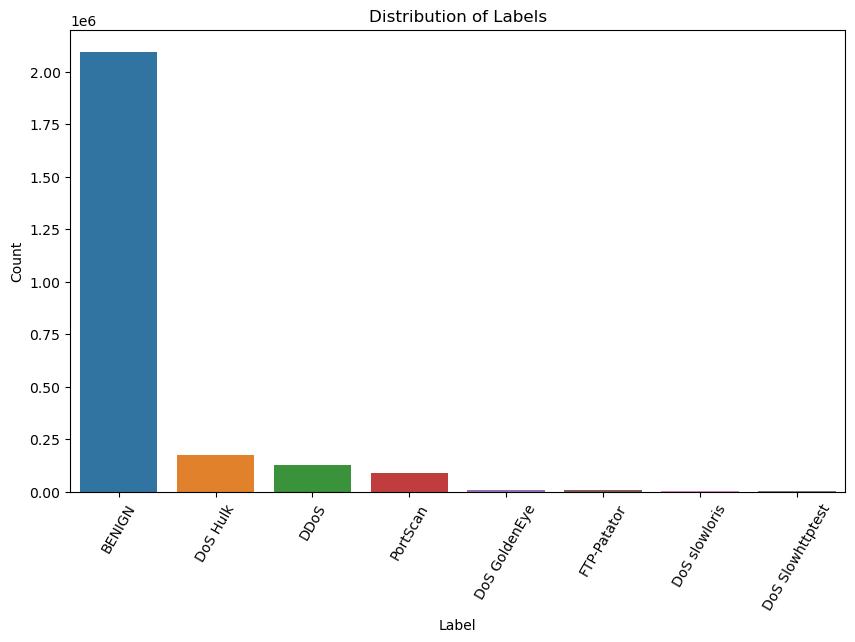

In [32]:
# visualizing the distribution of labels
plt.figure(figsize=(10,6))
sns.barplot(x=new_prediction_label_counts.index, y=new_prediction_label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

# Preparing Data for modeling

In [33]:
# getting categorical column
objList = df.select_dtypes(include = "object").columns
print (objList)
# encoding the labels to numerical data types using LabelEncoder
le = LabelEncoder()

for ob in objList:
    df[ob] = le.fit_transform(df[ob].astype(str))

# verifying that the categorical columns have been encoded to numerical data types
print (df.info())

Index([' Label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2513441 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float6

### In order to optimize memory we will convert data types

In [34]:
for column in df.columns:
    if df[column].dtype == np.int64:
        maxVal = df[column].max()
        if maxVal < 120:
            df[column] = df[column].astype(np.int8)
        elif maxVal < 32767:
            df[column] = df[column].astype(np.int16)
        else:
            df[column] = df[column].astype(np.int32)
            
    if df[column].dtype == np.float64:
        maxVal = df[column].max()
        minVal = df[df[column]>0][column]
        if maxVal < 120 and minVal>0.01 :
            df[column] = df[column].astype(np.float16)
        else:
            df[column] = df[column].astype(np.float32)

In [35]:
# now if we looked at info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513441 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int32  
 1    Flow Duration                int32  
 2    Total Fwd Packets            int32  
 3    Total Backward Packets       int32  
 4   Total Length of Fwd Packets   int32  
 5    Total Length of Bwd Packets  int32  
 6    Fwd Packet Length Max        int16  
 7    Fwd Packet Length Min        int16  
 8    Fwd Packet Length Mean       float32
 9    Fwd Packet Length Std        float32
 10  Bwd Packet Length Max         int16  
 11   Bwd Packet Length Min        int16  
 12   Bwd Packet Length Mean       float32
 13   Bwd Packet Length Std        float32
 14  Flow Bytes/s                  float32
 15   Flow Packets/s               float32
 16   Flow IAT Mean                float32
 17   Flow IAT Std                 float32
 18   Flow IAT Max              

#### Memory usage now is less 50% 

### We will calculate corroletion and check features with high correlation then drop them

In [36]:
# checking correlation of features to identify highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix =df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr
# threshold 0.85
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [37]:
# Removing features with high correlation
df.drop(corr_features,axis=1,inplace=True)

In [38]:
# seperating the dataframe into x and y
# x containing the features and y containing the target variable 'label'
X = df.drop([' Label'],axis=1)
y = df[' Label']

In [39]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,33,-1,20,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,109.0,0.0,109,0,0.0,0.0,0,0,0,0,0,20,20,9174.311523,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,20,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,52.0,0.0,52,0,0.0,0.0,0,0,0,0,0,20,20,19230.769531,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,20,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,34.0,0.0,34,0,0.0,0.0,0,0,0,0,0,20,20,29411.765625,6,0,0,0,1,1,1,0,0,0,0,0,0,31,329,20,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,32,-1,20,0.0,0.0,0,0.0


# Model Creation

In [40]:
# seperating the dataframe into x and y
# x containing the features and y containing the target variable 'label'
X = df.drop([' Label'],axis=1)
y = df[' Label']

In [41]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,33,-1,20,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,109.0,0.0,109,0,0.0,0.0,0,0,0,0,0,20,20,9174.311523,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,20,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,52.0,0.0,52,0,0.0,0.0,0,0,0,0,0,20,20,19230.769531,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,20,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,34.0,0.0,34,0,0.0,0.0,0,0,0,0,0,20,20,29411.765625,6,0,0,0,1,1,1,0,0,0,0,0,0,31,329,20,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,32,-1,20,0.0,0.0,0,0.0


In [50]:
df.shape

(2513441, 45)

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int32

In [52]:
# identifying the unique labels
unique_labels = y.unique()
print(unique_labels)

[0 1 7 6 5 4 3 2]


#### remenber we are using only labels with accuracy > 5000

In [53]:
# importing library to start making the model
from sklearn.preprocessing import RobustScaler # RobustScaler for scaling numerical features


In [54]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# importing library for function used to split data into training and testing sets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
# performing the actual splitting of your data with 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (1759408, 44)
Testing Set - X_test shape: (754033, 44)
Training Set - y_train shape: (1759408,)
Testing Set - y_test shape: (754033,)


#### Firstly we will create the ANN model and test its performance

In [57]:
model = Sequential() # initiating the model

# adding layers
model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],))) # first hidden layer
model.add(Dense(16, activation="selu")) # second hidden layer
model.add(Dense(8, activation="softmax")) #output layer

# model compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Early stopping to prevent overfitting during training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    callbacks=[early_stopping], validation_split=0.2)

C:\Users\alisr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
43986/43986 ━━━━━━━━━━━━━━━━━━━━ 116s 3ms/step - accuracy: 0.8099 - loss: 16076.7480 - val_accuracy: 0.8330 - val_loss: 0.7533
Epoch 2/20
43986/43986 ━━━━━━━━━━━━━━━━━━━━ 123s 3ms/step - accuracy: 0.8337 - loss: 6.2945 - val_accuracy: 0.8330 - val_loss: 0.6607
Epoch 3/20
43986/43986 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - accuracy: 0.8336 - loss: 8.8957 - val_accuracy: 0.8330 - val_loss: 0.6619
Epoch 4/20
43986/43986 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - accuracy: 0.8338 - loss: 0.7298 - val_accuracy: 0.8330 - val_loss: 0.6630
Epoch 5/20
43986/43986 ━━━━━━━━━━━━━━━━━━━━ 111s 3ms/step - accuracy: 0.8337 - loss: 4.7455 - val_accuracy: 0.8330 - val_loss: 0.6689
Epoch 5: early stopping


In [58]:
# Evaluating the performance of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

23564/23564 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8341 - loss: 0.6582
Test accuracy: 0.8337884545326233
23564/23564 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step
[0 0 0 ... 0 0 0]


In [59]:
class_report = classification_report(y_test, y_pred_class)
print('Classification Report:')
print(class_report)

C:\Users\alisr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alisr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    628704
           1       0.00      0.00      0.00     38363
           2       0.00      0.00      0.00      2972
           3       0.00      0.00      0.00     51815
           4       0.00      0.00      0.00      1566
           5       0.00      0.00      0.00      1597
           6       0.00      0.00      0.00      1764
           7       0.00      0.00      0.00     27252

    accuracy                           0.83    754033
   macro avg       0.10      0.12      0.11    754033
weighted avg       0.70      0.83      0.76    754033



C:\Users\alisr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### confusion matrix to analyze performance of model

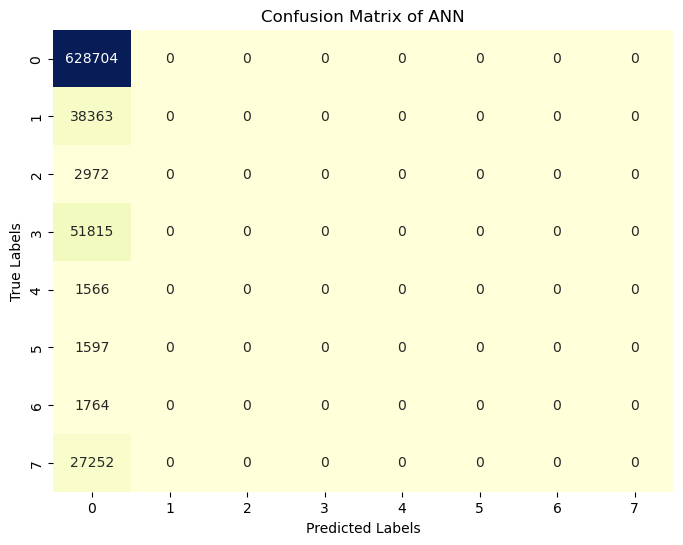

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of ANN')
plt.show()

#### the value 628704 at (0,0) indicates that 628704 instances of class 0 were correctly predicted as class 0, all other diagonal cells are 0, indicating that there were no predictions made for any other class apart from class 0.

In [72]:
# checking number of incorrect predictions
num_wrong = (y_test != y_pred_class).sum()

print('Number of incorrect predictions by ANN:', num_wrong)

Number of incorrect predictions by ANN: 125329


#### creating RandomForest classifier

In [71]:
rfc=RandomForestClassifier()
history2=rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(rfc_pred, y_test)
rfc_report = classification_report(rfc_pred, y_test)
rfc_matrix = confusion_matrix(rfc_pred, y_test)
print('Accuracy of RandomForestClassifier : ', round(rfc_accuracy, 3))
print('Classification report of RandomForestClassifier : \n', rfc_report)

Accuracy of RandomForestClassifier :  0.999
Classification report of RandomForestClassifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    628704
           1       1.00      1.00      1.00     38345
           2       1.00      0.99      1.00      2976
           3       1.00      1.00      1.00     51805
           4       0.99      0.99      0.99      1575
           5       0.99      0.99      0.99      1595
           6       1.00      1.00      1.00      1762
           7       0.99      0.99      0.99     27271

    accuracy                           1.00    754033
   macro avg       1.00      1.00      1.00    754033
weighted avg       1.00      1.00      1.00    754033



In [211]:
num_wrong = (y_test != rfc_pred).sum()

print('Number of incorrect predictions by RandomForestClassifier:', num_wrong)

Number of incorrect predictions by RandomForestClassifier: 838


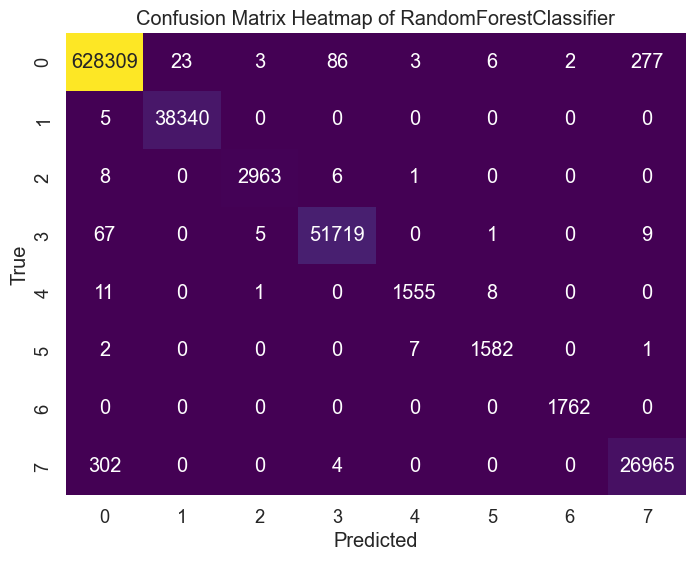

In [212]:
# confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(rfc_matrix, annot=True,fmt="d", cmap="viridis", cbar=False,)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of RandomForestClassifier")
plt.show()

## Analyzing the matrix

### Correct classification:
    -628311 instances of class 0 were correctly predicted as class 0.
    -38340 instances of class 1 were correctly predicted as class 1.
    -2962 instances of class 2 were correctly predicted as class 2.
    -51719 instances of class 3 were correctly predicted as class 3.
    -1555 instances of class 4 were correctly predicted as class 4.
    -1585 instances of class 5 were correctly predicted as class 5.
    -1762 instances of class 6 were correctly predicted as class 6.
    -26962 instances of class 7 were correctly predicted as class 7.

### incorrect classfification

#### for class 0:
    -23 instances were incorrectly predicted as class 1.
    -4 instances were incorrectly predicted as class 2.
    -85 instances were incorrectly predicted as class 3.
    -3 instances were incorrectly predicted as class 4.
    -4 instances were incorrectly predicted as class 5.
    -2 instances were incorrectly predicted as class 6.
    -281 instances were incorrectly predicted as class 7.

#### for class 1:
    -5 instances were incorrectly predicted as class 0.

#### for class 2:
    -8 instances were incorrectly predicted as class 0.
    -6 instances were incorrectly predicted as class 3.
    -1 instance was incorrectly predicted as class 4.

#### for class 3:
    -66 instances were incorrectly predicted as class 0.
    -5 instances were incorrectly predicted as class 2.
    -1 instance was incorrectly predicted as class 4.
    -8 instances were incorrectly predicted as class 7.

#### for class 4:
    -11 instances were incorrectly predicted as class 0.
    -1 instance is incorrectly predicted as class 2.
    -7 instances were incorrectly predicted as class 5.

#### for class 5:
    -1 instance was incorrectly predicted as class 0.
    -7 instances were incorrectly predicted as class 4.
    -1 instance was incorrectly predicted as class 7.

#### for class 7:
    -302 instances were incorrectly predicted as class 0.
    -5 instances were incorrectly predicted as class 3.

#### Comparing the to supervised methods accuracy

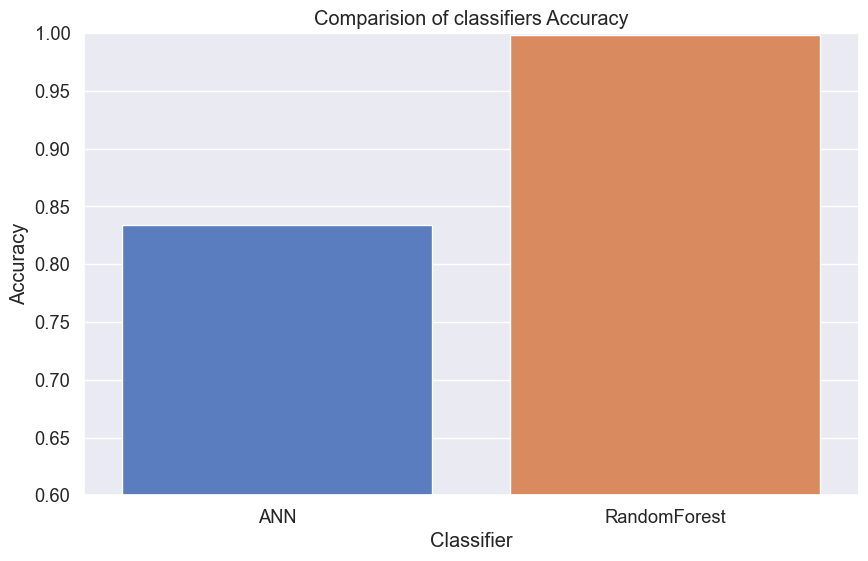

In [213]:
# comparing the classifiers accuracies
accuracies = [test_acc,rfc_accuracy]
classifiers = ['ANN','RandomForest']
plt.figure(figsize=(10,6))
sns.barplot(x=classifiers,y=accuracies,palette='muted')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparision of classifiers Accuracy')
plt.ylim(0.6,1.0)
plt.show()

In [70]:
df_sample = df[1000:2000])

(2513441, 45)

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def kmeans_analysis(data, k_range):
  for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # Silhouette score for cluster evaluation
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg:.4f}")


k_range = range(2, 5)  

# Perform K-Means clustering analysis with different k values
kmeans_analysis(df_sample, k_range)

C:\Users\alisr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 2, Silhouette Score: 0.9146
